<H1>Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel('data/AirQualityUCI.xlsx')

In [3]:
data.shape

(9357, 15)

In [4]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [5]:
data.info()  #no null values in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [6]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [7]:
data.describe(exclude= ['object' , 'datetime64[ns]'])

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


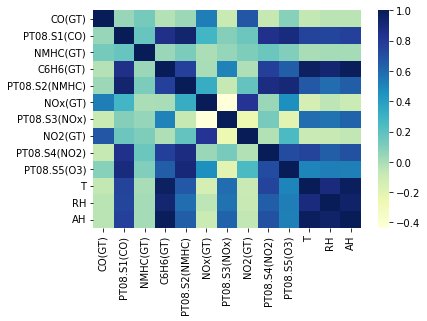

In [8]:
dataplot = pd.DataFrame(data.corr())
sb.heatmap(data.corr(), cmap="YlGnBu") #annot parameter adds number and cmap chooses color
plt.show()

In [9]:
# # row = []
# # col = []
# # value = []
# dataplotCol = np.array(dataplot.columns)
# for colu in dataplotCol:
#     for i in np.arange(13):
#         if dataplot[colu][i] < 0.5 or dataplot[colu][i] == 1:
#             dataplot[colu][i] = np.nan
#             # row.append(dataplotCol[i])
#             # col.append(colu)
#             # value.append(dataplot[colu][i])
# # pd.DataFrame([col,row,value])

In [10]:
dataplot['RH'] # RH has the most sensitivity to AH, C6H6(GT), T, PT08.S1(CO), PT08.S4(NO2), PT08.S2(NMHC), PT08.S3(NOx), PT08.S5(O3).

CO(GT)          -0.048231
PT08.S1(CO)      0.745344
NMHC(GT)         0.008288
C6H6(GT)         0.925068
PT08.S2(NMHC)    0.585775
NOx(GT)         -0.053008
PT08.S3(NOx)     0.573513
NO2(GT)         -0.081300
PT08.S4(NO2)     0.640685
PT08.S5(O3)      0.524922
T                0.885910
RH               1.000000
AH               0.943997
Name: RH, dtype: float64

In [11]:
mostCorrRH = np.array(['AH', 'C6H6(GT)', 'T', 'PT08.S1(CO)', 'PT08.S4(NO2)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S5(O3)'])

In [12]:
# for i in range(8):
#     plt.subplot(2,4,i+1)
#     plt.plot(data['RH'], data[mostCorrRH[i]])
#     # plt.xlabel('RH')
#     plt.ylabel(mostCorrRH[i])
# plt.show()

<H1> Data Preprocessing

In [13]:
for i in range(data.shape[0]):
    data.replace(data['Time'][i], data['Time'][i].hour, inplace= True)

AttributeError: 'numpy.int64' object has no attribute 'hour'

In [14]:
month = []
year = []
for i in range(data.shape[0]):
    month.append(data['Date'][i].month)
    year.append(data['Date'][i].year)

In [15]:
data.insert(0, "Month", month)
data.insert(1, "Year", year)

In [16]:
data.drop(["Date"], axis = 1, inplace = True)

In [17]:
dataplot2 = pd.DataFrame(data.corr())

In [18]:
dataplot2['RH'] #since year has very less correlation remove year

Month            0.050273
Year            -0.028024
Time            -0.108786
CO(GT)          -0.048231
PT08.S1(CO)      0.745344
NMHC(GT)         0.008288
C6H6(GT)         0.925068
PT08.S2(NMHC)    0.585775
NOx(GT)         -0.053008
PT08.S3(NOx)     0.573513
NO2(GT)         -0.081300
PT08.S4(NO2)     0.640685
PT08.S5(O3)      0.524922
T                0.885910
RH               1.000000
AH               0.943997
Name: RH, dtype: float64

In [19]:
data.drop(["Year"], axis = 1, inplace = True)

In [20]:
columns = np.array(data.columns)
new_col = ['Month', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH','RH']
data = data.reindex(columns = new_col)

In [21]:
data.duplicated().sum() #no duplicate values

0

In [22]:
array = data.to_numpy()

In [23]:
array

array([[ 3.        , 18.        ,  2.6       , ..., 13.5999999 ,
         0.75775383, 48.87500095],
       [ 3.        , 19.        ,  2.        , ..., 13.29999995,
         0.72548745, 47.69999981],
       [ 3.        , 20.        ,  2.2       , ..., 11.9000001 ,
         0.75023907, 53.97500038],
       ...,
       [ 4.        , 12.        ,  2.4       , ..., 26.89999962,
         0.64064877, 18.34999967],
       [ 4.        , 13.        ,  2.1       , ..., 28.32499981,
         0.51386592, 13.54999995],
       [ 4.        , 14.        ,  2.2       , ..., 28.50000048,
         0.50280371, 13.125     ]])

In [24]:
scaler = StandardScaler()

In [25]:
X = array[:, :14]
Y = array[:, 14]

In [26]:
len(Y) == len(X)

True

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, train_size=  0.9)

In [28]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<H1> Model

In [29]:
import sys

In [30]:
sys.path.append("C:/Users/hp/OneDrive - IIT Kanpur/Winter-Project-ML-Che/210079_Ajitesh Shree/Assignment_1")

In [31]:
import linearRegression as lr
from linearRegression import *

In [32]:
def error(y, yPred):
    ev = y - yPred
    error = 0
    for ele in ev:
        error = error + ele*ele
    return error/(2*(ev.shape[0]))

45.737892993930444

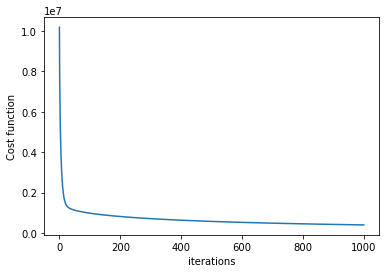

In [33]:
theta = fitGD(X_train,Y_train, 1e-5, 0.01, 0, 1000)
y_Pred = np.matmul(np.hstack((np.ones((X_test.shape[0], 1)), X_test)),theta).reshape(Y_test.shape[0])
error(Y_test, y_Pred) #most min error i got
# theta

47.12325263554546

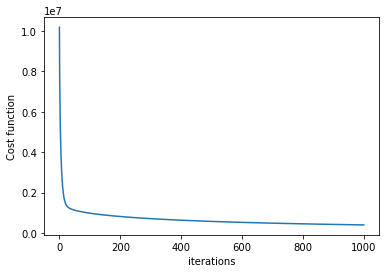

In [34]:
theta3 = fitGD(X_train,Y_train, 1e-5, 0.01, 0, 1000)
y_Pred3 = np.matmul(np.hstack((np.ones((X_train.shape[0], 1)), X_train)),theta3).reshape(Y_train.shape[0])
error(Y_train, y_Pred3) #most min error i got
# theta

In [35]:
y_Pred #prediction using my function on X_test

array([-198.11116772,   54.43669166,   55.09432513,   60.21773135,
         72.21251535,   44.17862528,   36.38534004,   58.35994569,
         30.67908478,   49.28822749,   49.78512244,   46.81427716,
         43.97348157,   66.61540513,   28.65066238,   50.30634062,
         31.75387831,   38.15716825,   21.3224148 ,   61.50576002,
         71.02154724,   55.17793601,   55.09475841,   61.44118202,
         45.49645908,   56.78662795,   57.19996258,   38.8082674 ,
         52.16017828,   46.88490929,   59.19715285,   24.27568521,
         45.42595751,   59.66753433, -206.86059839,   63.92117064,
         48.49060309,   48.24725564,   47.4775824 ,   63.80404122,
         64.90287038,   54.71532089,   34.09780552,   50.86846192,
         59.74800741,   43.56166732,   65.21362036,   57.18584734,
         41.09467858,   35.42417422,   33.18353011,   42.02554537,
         57.5690381 ,   49.71091382,   32.78293193,   45.3642309 ,
         51.69011162,   55.25561613,   49.93395411,   56.73768

In [36]:
y_Pred3 #prediction using my function on X_train

array([57.22914482, 46.25204667, 48.98230721, ..., 47.66637244,
       51.67865418, 64.85900637])

<h4> Using Normal Equation

In [37]:
theta2 = fitNormal(X_train, Y_train)
y_Pred2 = np.matmul(np.hstack((np.ones((X_test.shape[0], 1)), X_test)),theta2).reshape(Y_test.shape[0])
error(Y_test, y_Pred2)

24.155988567107016

In [38]:
y_Pred2 #prediction using Normal Equation

array([-200.44697914,   49.79885961,   55.66301777,   67.9135732 ,
         72.26267903,   51.35728429,   16.70228374,   60.67448288,
         26.69100026,   46.13401931,   46.38254156,   37.16636859,
         42.27802483,   67.34305026,   32.58645929,   57.84338989,
         30.96503986,   40.34897906,   17.4462651 ,   65.73967864,
         64.82541491,   50.7146614 ,   36.9311181 ,   59.66391976,
         48.27097471,   54.65452501,   64.08330558,   47.15784564,
         51.2880633 ,   49.64607673,   67.48586152,   12.68556603,
         32.0318095 ,   58.55210774, -209.41060265,   62.19221093,
         52.94244516,   43.20918989,   54.40886563,   64.53539618,
         63.26690357,   57.55408524,   35.58739454,   55.42610676,
         60.23991844,   41.4475872 ,   69.15250773,   64.99199912,
         46.89688411,   25.63989046,   15.43034621,   34.74058414,
         59.54960007,   54.95000019,   18.79291266,   38.84622165,
         55.41004912,   58.73568458,   49.20891855,   53.75113